### 1-17. Where is a particular taxi cab going?

[Taxi Trajectory Dataset](https://www.kaggle.com/c/pkdd-15-predict-taxi-service-trajectory-i)

In [2]:
!ls Datasets/Taxi\ Trajectory\ and\ Time

metaData_taxistandsID_name_GPSlocation.csv
sampleSubmissionTime.csv
sampleSubmissionTrajectory.csv
test.csv
train.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline


In [36]:
datafiles = glob.glob('Datasets/Taxi*/*')

train = pd.DataFrame(pd.read_csv(datafiles[-1]))

In [37]:
print len(train)

1710670


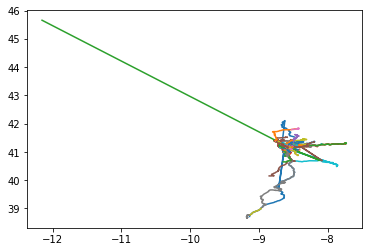

/Users/nickvazz/Desktop/virtual_envs/ML_venv/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


ValueError: range parameter must be finite.

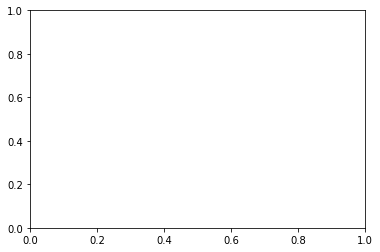

In [42]:
# print train.iloc[0]['POLYLINE']

tripLength = []

for i in range(len(train)/100):
    try:
        stuff = np.asarray([float(x.replace('[','').replace(']','')) for x in train.iloc[i]['POLYLINE'].split(',')])
        stuff = stuff.reshape(-1,2)
        tripLength.append(((len(stuff)-1)*15)/60.)

        plt.plot(stuff[:,0],stuff[:,1])
    except:
        pass
plt.show()
plt.hist(np.log(tripLength),bins=100)
print train.iloc[0]